In [ ]:
from sklearn.metrics import plot_confusion_matrix,ConfusionMatrixDisplay
import matplotlib.pyplot as plt


import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, regularizers
from keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D, LeakyReLU
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.utils import shuffle
from tensorflow.keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt
plt.rc('font', size=18)
import sys

In [ ]:
import os
from google.colab import drive
drive.mount('/content/drive')

path = "/content/drive/My Drive"
os.chdir(path)
os.listdir(path)


Mounted at /content/drive


['Colab Notebooks',
 'CV',
 'ResearchPaperProcess.gsheet',
 'Use Case.gdoc',
 'Architecture.gdoc',
 'MAIN_ASE_Semester 1_group5.gdoc',
 'ML_group_report.gsheet',
 'ASE_semester1_group5.gsheet',
 '2022-11-21 21-02-55 (online-video-cutter.com).mp4',
 'AI',
 'ML_group',
 'seal.model']

In [ ]:
import pathlib
image_dir = "/content/drive/My Drive/ML_group/newData/train/"

image_dir = pathlib.Path(image_dir)

train_count = len(list(image_dir.glob('*/*.jpg')))
# train_count = len(os.listdir(train_dir)train_dir.glob('*/*.jpg')))

CLASS_NAMES = np.array([item.name for item in image_dir.glob('*') if item.is_dir()])
print(CLASS_NAMES)

['zhong' 'xue' 'zhu' 'zhe' 'wu' 'wu1' 'xin' 'zhao' 'xiang' 'zu' 'sheng'
 'lu1' 'mian' 'ting' 'shi' 'ling' 'lu' 'shang' 'nan' 'shao' 'lang'
 'guang1' 'hu' 'hua' 'lao' 'jian' 'guang' 'hai' 'hao' 'han' 'fan' 'gou'
 'chun' 'cheng' 'chen' 'cheng1' 'cun' 'di' 'dao' 'de' 'an1' 'an' 'ben'
 'bing' 'ai' 'bai' 'cao' 'cao1' 'ao' 'bao']


In [ ]:
image_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1. / 255,
    
    )





IMG_HEIGHT = 100
IMG_WIDTH = 100
train_data_gen = image_generator.flow_from_directory(directory=str(image_dir),
                                                     batch_size=3000,
                                                     color_mode="grayscale",
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     shuffle=True,
                                  
                                                     classes=list(CLASS_NAMES)
                                                     )

Found 2107 images belonging to 50 classes.


In [ ]:
x, y = train_data_gen.next()
print(x.shape)
print(y.shape)

(2107, 100, 100, 1)
(2107, 50)


In [ ]:
n=1600
x_train=x[:n]
y_train=y[:n]
x_test=x[n:]
y_test=y[n:]
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(1600, 100, 100, 1)
(1600, 50)
(507, 100, 100, 1)
(507, 50)


In [ ]:
def changeSize(data):
  newData=[]
  for i in range(len(data)):
    newData.append(tf.image.resize(data[i], (227,227)))
  return np.array(newData)
x_train_227=changeSize(x_train)
x_test_227=changeSize(x_test)

In [ ]:
num_classes = 50
input_shape = (227, 227)

In [ ]:
x_train=np.load('/content/drive/My Drive/ML_group/newData/x_train_227.npy')
x_test=np.load('/content/drive/My Drive/ML_group/newData/x_test_227.npy')
y_train=np.load('/content/drive/My Drive/ML_group/newData/y_train.npy')
y_test=np.load('/content/drive/My Drive/ML_group/newData/y_test.npy')
CLASS_NAMES=['zhong','xue', 'zhu', 'zhe', 'wu', 'wu1', 'xin', 'zhao', 'xiang', 'zu', 'sheng',
 'lu1', 'mian', 'ting', 'shi', 'ling', 'lu', 'shang', 'nan', 'shao', 'lang',
 'guang1', 'hu', 'hua', 'lao', 'jian', 'guang', 'hai', 'hao', 'han', 'fan', 'gou',
 'chun', 'cheng', 'chen', 'cheng1' ,'cun' ,'di' ,'dao' ,'de', 'an1', 'an' ,'ben',
 'bing' ,'ai' ,'bai' ,'cao', 'cao1', 'ao' ,'bao']

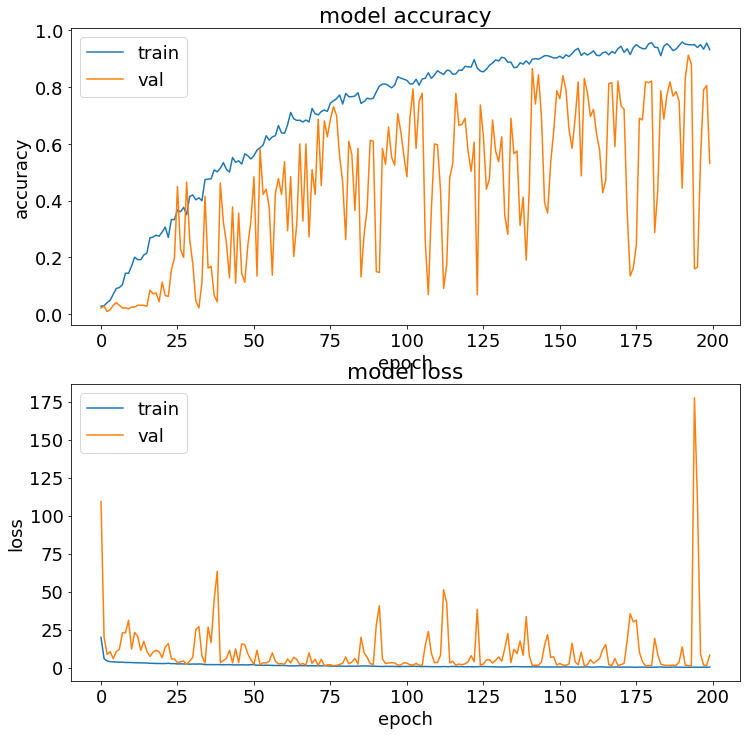

50/50 [==============================] - 0s 4ms/step
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        33
           1       1.00      1.00      1.00        31
           2       0.93      1.00      0.96        25
           3       0.97      1.00      0.99        35
           4       1.00      0.86      0.93        37
           5       1.00      1.00      1.00        31
           6       0.97      0.97      0.97        40
           7       1.00      0.96      0.98        28
           8       0.93      0.96      0.95        27
           9       0.97      0.94      0.96        35
          10       1.00      1.00      1.00        26
          11       1.00      1.00      1.00        32
          12       0.97      1.00      0.99        36
          13       1.00      1.00      1.00        27
          14       0.65      1.00      0.78        20
          15       1.00      1.00      1.00        35
          16       1.00     

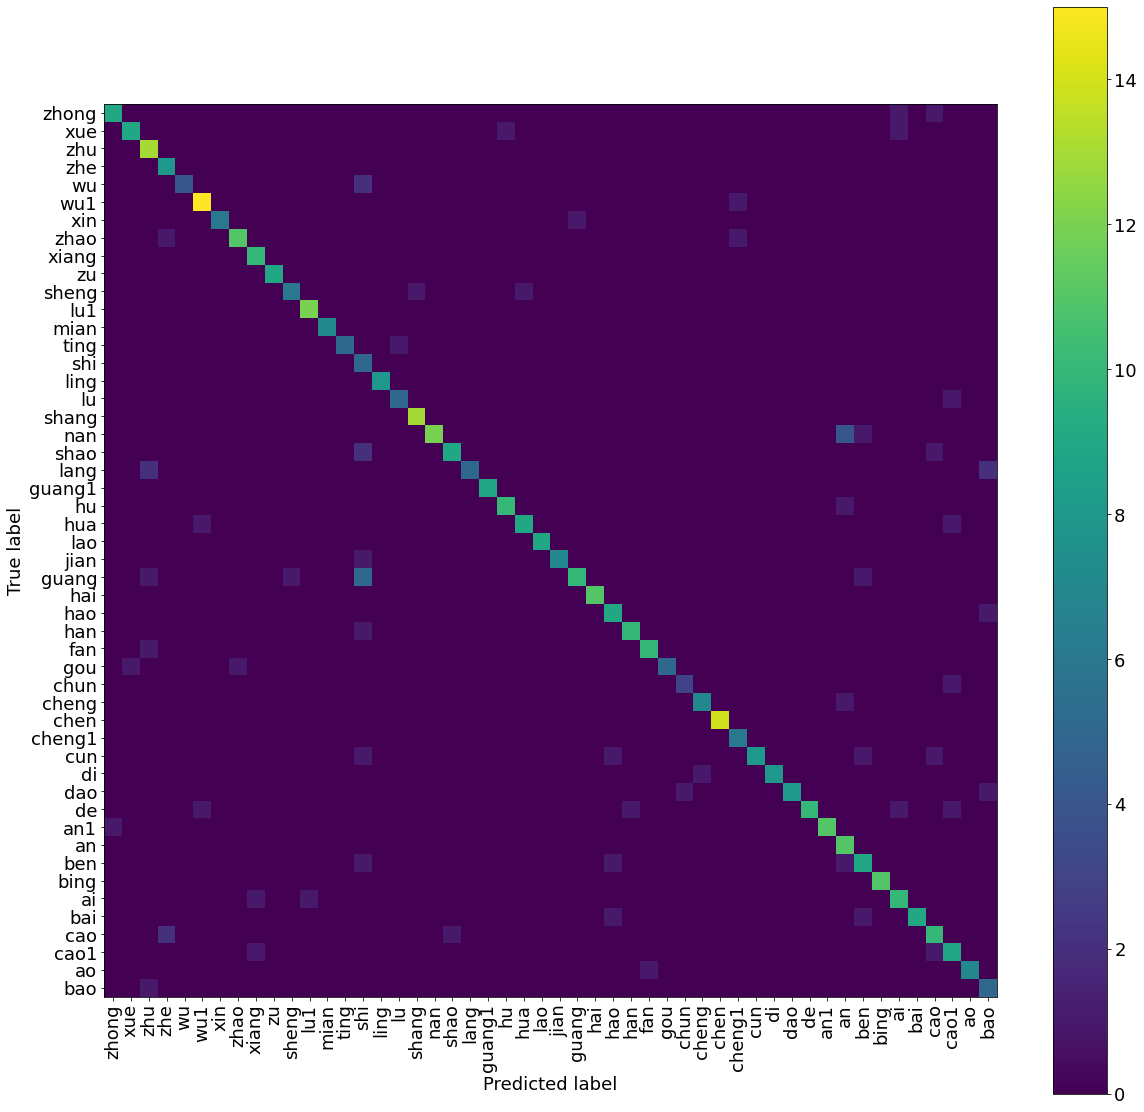

In [ ]:
use_saved_model=True
model = keras.models.Sequential([
    keras.layers.Conv2D(filters=96, kernel_size=(11,11), strides=(4,4), activation='relu', input_shape=(227,227,1)),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(4096, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(4096, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(50, activation='softmax')
])
if use_saved_model:
  model.load_weights("/content/drive/My Drive/ML_group/newData/best.hdf5")
  # model = keras.models.load_model("/content/drive/My Drive/ML_group/newData/new_alexnet.model")
else:

  model = keras.models.Sequential([
    keras.layers.Conv2D(filters=96, kernel_size=(11,11), strides=(4,4), activation='relu', input_shape=(227,227,1)),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(4096, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(4096, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(50, activation='softmax')
])
  
  model.compile(loss="categorical_crossentropy", optimizer='adam', metrics=["accuracy"])
  model.summary()

epochs=200
batch_size = 64
checkpoint_filepath = '/content/drive/My Drive/ML_group/newData/best.hdf5'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True
  )
# history = model.fit(x_train_227, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.2,callbacks=[model_checkpoint_callback],verbose=1)
# model.save("/content/drive/My Drive/ML_group/newData/new_alexnet.model")
plt.rcParams["figure.figsize"] = (12,12)
plt.subplot(211)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.subplot(212)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss'); plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


preds = model.predict(x_train_227)
y_pred = np.argmax(preds, axis=1)
y_train1 = np.argmax(y_train, axis=1)
print(classification_report(y_train1, y_pred))
print(confusion_matrix(y_train1,y_pred))

preds = model.predict(x_test_227)
y_pred = np.argmax(preds, axis=1)
y_test1 = np.argmax(y_test, axis=1)
print(classification_report(y_test1, y_pred))
print(confusion_matrix(y_test1,y_pred))


plt.rcParams["figure.figsize"] = (20,20)
cm=confusion_matrix(y_test1,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=CLASS_NAMES)
disp.plot(
    include_values=False,           
    cmap="viridis",                 
    ax=None,                       
    xticks_rotation="vertical",  
    values_format="d"  )          
plt.show()



<ipython-input-23-abb662c99719>:30: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])


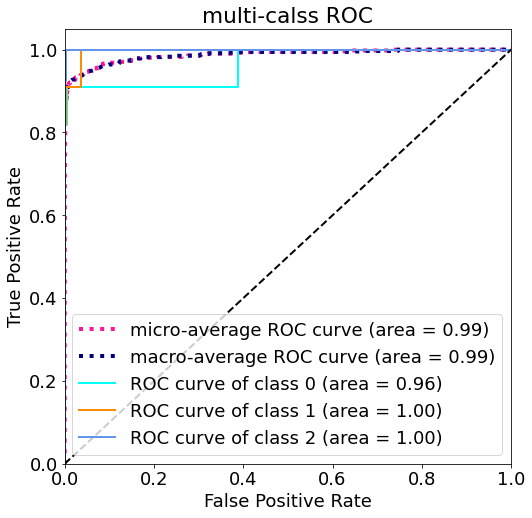

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle
from sklearn.metrics import roc_curve, auc
from scipy import interp
plt.rcParams["figure.figsize"] = (8,8)
y_label = y_test
y_score = y_pred_proba
 
n_classes = 50



# micro（方法二）
fpr["micro"], tpr["micro"], _ = roc_curve(y_label.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
 
# macro（方法一）
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])
# Finally average it and compute AUC
mean_tpr /= n_classes
fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])
 
# Plot all ROC curves
lw=2
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)
 
plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='baseling SVM (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)


colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))
    if i ==2:
      break

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('multi-calss ROC')
plt.legend(loc="lower right")



In [ ]:
np.save('/content/drive/My Drive/ML_group/newData/x_train_227.npy', x_train_227)
np.save('/content/drive/My Drive/ML_group/newData/y_train.npy', y_train)
np.save('/content/drive/My Drive/ML_group/newData/x_test_227.npy', x_test_227)
np.save('/content/drive/My Drive/ML_group/newData/y_test.npy', y_test)

50/50 [==============================] - 0s 4ms/step
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        33
           1       1.00      1.00      1.00        31
           2       1.00      0.96      0.98        25
           3       1.00      1.00      1.00        35
           4       0.97      0.97      0.97        37
           5       1.00      1.00      1.00        31
           6       0.95      0.97      0.96        40
           7       0.97      1.00      0.98        28
           8       1.00      0.93      0.96        27
           9       1.00      1.00      1.00        35
          10       1.00      1.00      1.00        26
          11       0.94      1.00      0.97        32
          12       0.97      1.00      0.99        36
          13       1.00      0.96      0.98        27
          14       1.00      1.00      1.00        20
          15       0.97      1.00      0.99        35
          16       0.97     

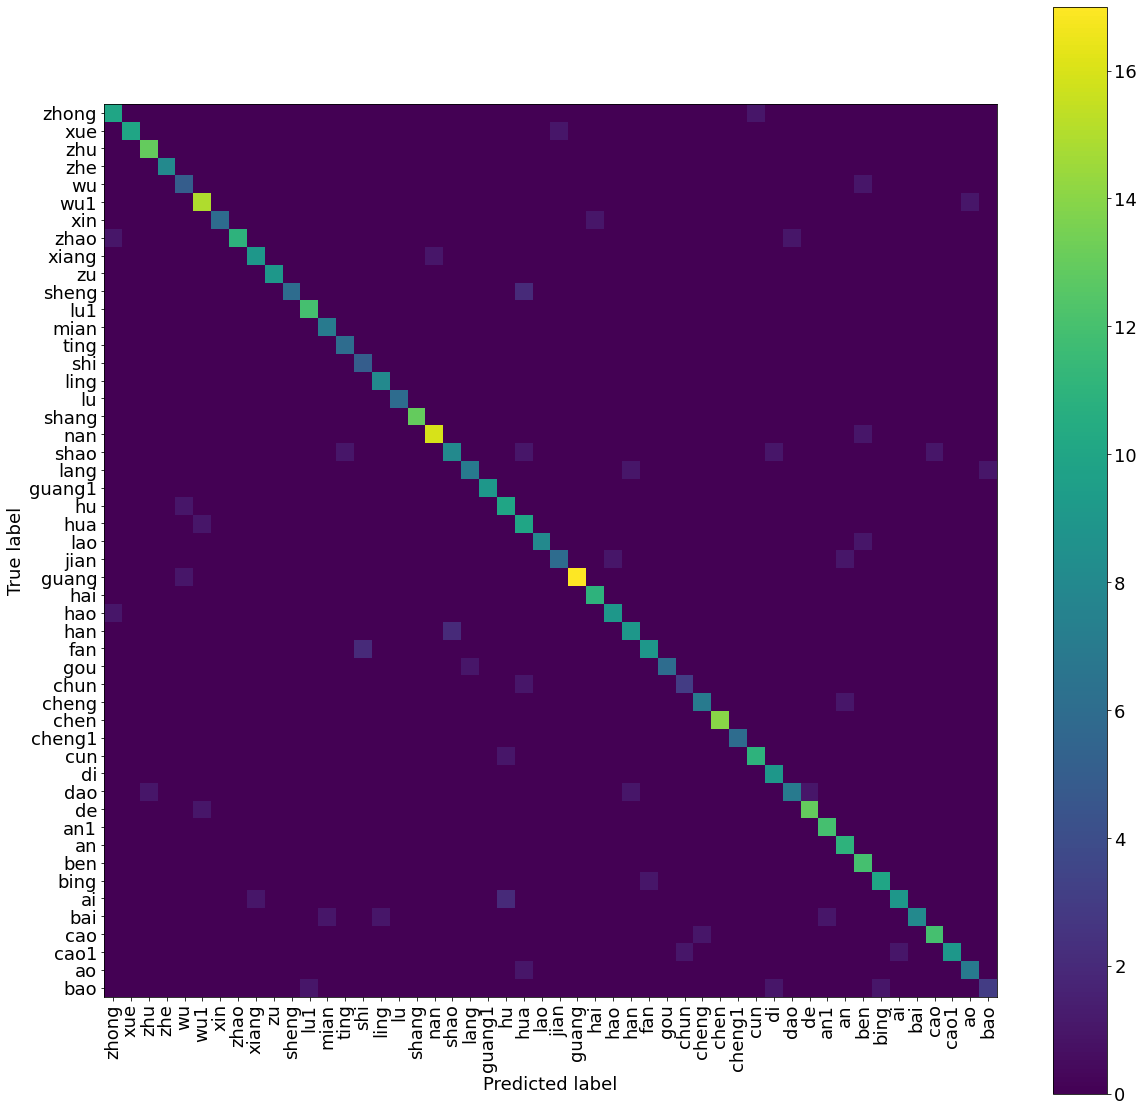

In [ ]:
def ApplyAlexnetWithL1(use_saved_model,epochs,x_train,y_train,x_test,y_test):
  model = keras.models.Sequential([
      keras.layers.Conv2D(filters=96, kernel_size=(11,11), strides=(4,4), activation='relu', input_shape=(227,227,1)),
      keras.layers.BatchNormalization(),
      keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
  
      keras.layers.Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), activation='relu', padding="same"),
      keras.layers.BatchNormalization(),
      keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    
      keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
      keras.layers.BatchNormalization(),
   
      keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
      keras.layers.BatchNormalization(),
    
      keras.layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
      keras.layers.BatchNormalization(),
   
      keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
      keras.layers.Flatten(),
      keras.layers.Dense(4096, activation='relu',kernel_regularizer=regularizers.l1(0.001)),
      keras.layers.Dropout(0.5),
      keras.layers.Dense(4096, activation='relu',kernel_regularizer=regularizers.l1(0.001)),
      keras.layers.Dropout(0.5),
      keras.layers.Dense(50, activation='softmax')
  ])
  if use_saved_model:
    model.load_weights("/content/drive/My Drive/ML_group/newData/best_l1.hdf5")
  else:

    
    model.compile(loss="categorical_crossentropy", optimizer='adam', metrics=["accuracy"])
    model.summary()

  checkpoint_filepath = '/content/drive/My Drive/ML_group/newData/best_l1.hdf5'
  model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True
  )
  batch_size = 64
  plt.rcParams["figure.figsize"] = (12,12)
  # history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.2,callbacks=[model_checkpoint_callback])
  # model.save("/content/drive/My Drive/ML_group/newData/alexnet.model")
  # plt.subplot(211)
  # plt.plot(history.history['accuracy'])
  # plt.plot(history.history['val_accuracy'])
  # plt.title('model accuracy')
  # plt.ylabel('accuracy')
  # plt.xlabel('epoch')
  # plt.legend(['train', 'val'], loc='upper left')
  # plt.subplot(212)
  # plt.plot(history.history['loss'])
  # plt.plot(history.history['val_loss'])
  # plt.title('model loss')
  # plt.ylabel('loss'); plt.xlabel('epoch')
  # plt.legend(['train', 'val'], loc='upper left')
  # plt.show()

  
  preds = model.predict(x_train)
  y_pred = np.argmax(preds, axis=1)
  y_train1 = np.argmax(y_train, axis=1)
  print(classification_report(y_train1, y_pred))
  print(confusion_matrix(y_train1,y_pred))

  preds = model.predict(x_test)
  y_pred = np.argmax(preds, axis=1)
  y_test1 = np.argmax(y_test, axis=1)
  print(classification_report(y_test1, y_pred))
  print(confusion_matrix(y_test1,y_pred))
  
  
  plt.rcParams["figure.figsize"] = (20,20)
  cm=confusion_matrix(y_test1,y_pred)
  disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=CLASS_NAMES)
  disp.plot(
      include_values=False,           
      cmap="viridis",                 
      ax=None,                       
      xticks_rotation="vertical",  
      values_format="d"  )          
  plt.show()

ApplyAlexnetWithL1(True,200,x_train,y_train,x_test,y_test)